<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Ejercicios_simulaci%C3%B3n_SyS_nov_16/Punto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ejercicio**

4. Fije los valores de los párametros del sistema rlc paralelo, con condiciones iniciales cero, para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón.

#**Simulación**

#**Circuito RLC paralelo**



*   Salida ante una entrada escalón





In [15]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C, w = sym.symbols('t R L C omega', positive=True)
X = 1 / s # entrada escalon
H=control.TransferFunction(1,(s**2 + s/(R*C) + 1/(L*C))*L*C,s) #Funcion de transferencia con la API de control
H
Y = H.num * X /H.den #función de transferencia del circuito multiplicada por X(s)
Y

          1           
──────────────────────
      ⎛ 2    s     1 ⎞
C⋅L⋅s⋅⎜s  + ─── + ───⎟
      ⎝     C⋅R   C⋅L⎠

para simular la respuesta subamortiguada, sobreamortiguada, de amortiguamiento critico, oscilatoria e inestable, ante entrada escalón. Necesitamos encontrar la forma canónica SLIT de segundo orden




In [21]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

    L⋅(C⋅R⋅s + 1)      1
- ────────────────── + ─
         2             s
  C⋅L⋅R⋅s  + L⋅s + R    

In [22]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt


    ⎛  -t      ⎛     ____________⎞     -t      ⎛     ____________⎞⎞    
    ⎜ ─────    ⎜    ╱      2     ⎟    ─────    ⎜    ╱      2     ⎟⎟    
    ⎜ 2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟    2⋅C⋅R    ⎜t⋅╲╱  4⋅C⋅R  - L ⎟⎟    
    ⎜ℯ     ⋅cos⎜─────────────────⎟   ℯ     ⋅sin⎜─────────────────⎟⎟    
    ⎜          ⎝     2⋅C⋅√L⋅R    ⎠             ⎝     2⋅C⋅√L⋅R    ⎠⎟    
- L⋅⎜───────────────────────────── + ─────────────────────────────⎟ + 1
    ⎜              L                             ____________     ⎟    
    ⎜                                           ╱      2          ⎟    
    ⎝                                      √L⋅╲╱  4⋅C⋅R  - L      ⎠    


*   Respuesta subamortiguada

  0 < $\xi$ <1



In [38]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 100, L: 0.1, C: 0.01}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

                        -0.5⋅t                            -0.5⋅t              
1 - 0.0158133650950361⋅ℯ      ⋅sin(31.6188235075248⋅t) - ℯ      ⋅cos(31.618823

          
5075248⋅t)

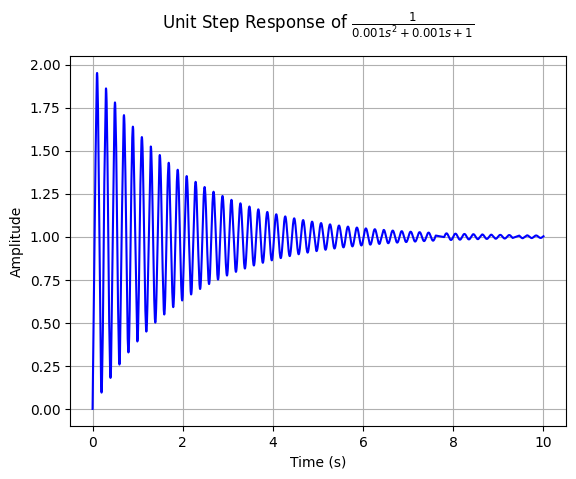

In [36]:

HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)


*  Respuesta sobreamortiguada

 $\xi$ >1



In [40]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 1, C: 10}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

         -t                              
         ───                             
          20    ⎛√39⋅t⎞    -t            
    √39⋅ℯ   ⋅sin⎜─────⎟    ───           
                ⎝  20 ⎠     20    ⎛√39⋅t⎞
1 - ─────────────────── - ℯ   ⋅cos⎜─────⎟
             39                   ⎝  20 ⎠

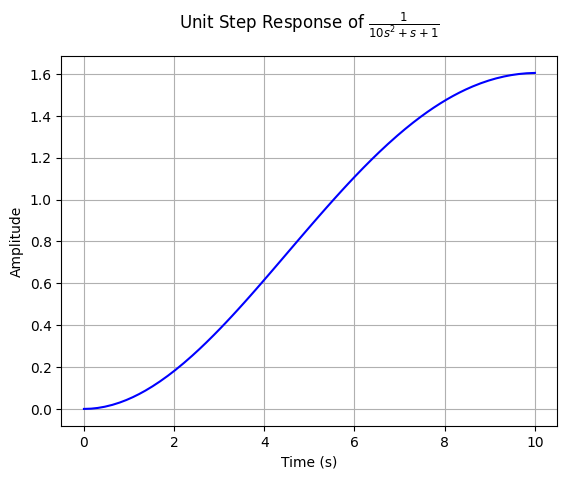

In [41]:

HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)



*  Respuesta de amortiguamiento crítico

 $\xi$ = 1




In [44]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 1, C: 4}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

         -t                              
         ───                             
          8     ⎛√15⋅t⎞    -t            
    √15⋅ℯ   ⋅sin⎜─────⎟    ───           
                ⎝  8  ⎠     8     ⎛√15⋅t⎞
1 - ─────────────────── - ℯ   ⋅cos⎜─────⎟
             15                   ⎝  8  ⎠

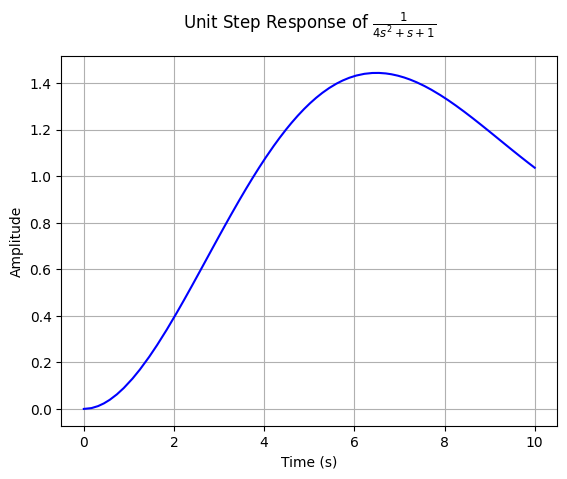

In [45]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)



*   Respuesta inestable

$\xi$ < 0




In [46]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: -1, L: 1, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

    t                             
    ─                             
    2    ⎛√3⋅t⎞    t              
√3⋅ℯ ⋅sin⎜────⎟    ─              
         ⎝ 2  ⎠    2    ⎛√3⋅t⎞    
─────────────── - ℯ ⋅cos⎜────⎟ + 1
       3                ⎝ 2  ⎠    

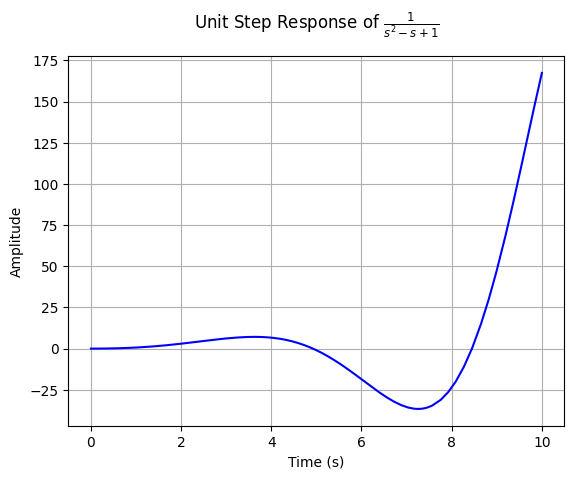

In [47]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)

*   Respuesta oscilatoria

$\xi$ = 0

In [48]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: 0, C: 1}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

0

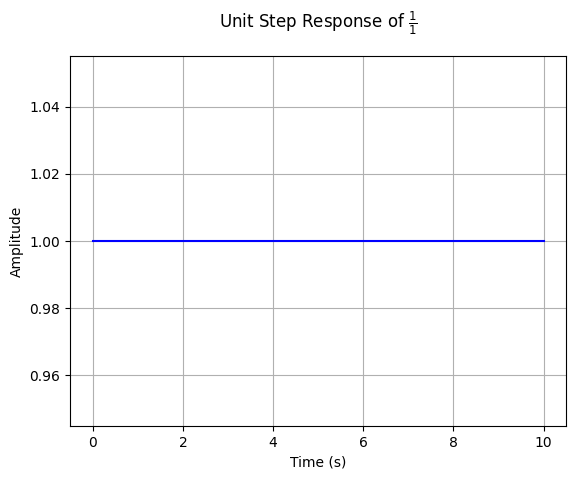

In [49]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.step_response_plot(HRLC)